<a href="https://colab.research.google.com/github/pranarahayu/Football-Data/blob/main/Pizza_Radar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mplsoccer
!pip install highlight_text

In [3]:
import pandas as pd
import numpy as np

from PIL import Image
from urllib.request import urlopen

from mplsoccer import PyPizza, add_image, FontManager
import matplotlib.pyplot as plt

from highlight_text import fig_text

import os
import glob
from datetime import date

In [34]:
#mount to gdrive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

#loading the latest file update
path2 = '/content/gdrive/MyDrive/Liga Indonesia 2022/Percentile/Liga 2'
files = glob.glob(os.path.join(path2, "*.xlsx"))

#load the file to a dataframe
df = pd.DataFrame()
newest = max(files, key=os.path.getctime)
data = pd.read_excel(newest)
df = df.append(data)

Mounted at /content/gdrive


In [35]:
font_normal = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                           "Roboto-Regular.ttf?raw=true"))
font_italic = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                           "Roboto-Italic.ttf?raw=true"))
font_bold = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                         "Roboto-Medium.ttf?raw=true"))

In [ ]:
df_fw = df.loc[(df['Position_pct']=='Forward')]

temp = pd.DataFrame()
klubs = pd.DataFrame()

temp['Name'] = df_fw['Name']
temp['Team'] = df_fw['Team_pct']

temp['Shots'] = round(df_fw['Shots_pct'])
temp['Goals'] = round(df_fw['Goals_pct'])
temp['Chances Created'] = round(df_fw['Create Chance_pct'])
temp['Shots on Target %'] = round(df_fw['Shot on Target Ratio_pct'])
temp['Conversion Ratio'] = round(df_fw['Conversion Ratio_pct'])

temp['Assist'] = round(df_fw['Assist_pct'])

temp['Pass Accuracy'] = round(df_fw['Pass Accuracy_pct'])
temp['Successful Dribbles'] = round(df_fw['Dribble_pct'])

temp['Successful Tackles'] = round(df_fw['Tackle_pct'])
temp['Intercepts'] = round(df_fw['Intercepts_pct'])
temp['Recoveries'] = round(df_fw['Recovery_pct'])
temp['Aerial Won %'] = round(df_fw['Aerial Won %_pct'])

temp = temp[(temp['Name']=='Arianto') | (temp['Name']=='Average FW')].reset_index()

klubs['Team'] = temp['Team']

temp = temp.drop(['Team'],axis=1)

player = temp[~temp['Name'].str.contains('Average')]
avg_player = temp[temp['Name'].str.contains('Average')]
club = klubs[~klubs['Team'].str.contains('Average')]
p_name = list(player['Name'])[0]
av_name = list(avg_player['Name'])[0]
c_name = list(club['Team'])[0]

filename = 'perf.radar_' + p_name + '.jpg'

params = list(temp.columns)
params = params[2:]
params

a_values = []
b_values = []
    
for x in range(len(temp['Name'])):
    if temp['Name'][x] == p_name:
        a_values = temp.iloc[x].values.tolist()
    if temp['Name'][x] == av_name:
        b_values = temp.iloc[x].values.tolist()
        
a_values = a_values[2:]
b_values = b_values[2:]

values = [a_values,b_values]

slice_colors = ["#C42021"] * 5 + ["#F7D002"] * 1 + ["#336699"] * 2 + ["#2B9720"] * 4
text_colors = ["#FCFFFD"] * 5 + ["#141204"] * 1 + ["#FCFFFD"] * 6

baker = PyPizza(
    params=params,                  # list of parameters
    background_color="#EBEBE9",     # background color
    straight_line_color="#EBEBE9",  # color for straight lines
    straight_line_lw=2,             # linewidth for straight lines
    last_circle_lw=0,               # linewidth of last circle
    other_circle_lw=0,              # linewidth for other circles
    inner_circle_size=20            # size of inner circle
)

# plot pizza
fig, ax = baker.make_pizza(
    a_values,
    compare_values=b_values,                          # list of values
    figsize=(8, 8),                # adjust figsize according to your need
    color_blank_space="same",        # use same color to fill blank space
    slice_colors=slice_colors,       # color for individual slices
    value_colors=text_colors,        # color for the value-text
    value_bck_colors=slice_colors,   # color for the blank spaces
    blank_alpha=0.4,                 # alpha for blank-space colors
    kwargs_slices=dict(
        edgecolor="none", zorder=0, linewidth=2
    ),
    
    kwargs_compare=dict(
        facecolor="none", edgecolor="#FCFFFD",
        zorder=8, linewidth=2
                                   ),                               # values to be used when plotting slices
    kwargs_params=dict(
        color="#141204", fontsize=11,
        va="center"
    ),                               # values to be used when adding parameter
    kwargs_values=dict(
        color="#252627", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#FCFFFD",
            boxstyle="round,pad=0.2", lw=1
        )
    ),
    
    kwargs_compare_values=dict(
        color="#252627", fontsize=11, zorder=3, alpha=0,
        bbox=dict(edgecolor="#252627", facecolor="#E1E2EF", boxstyle="round,pad=0.2", lw=1, alpha = 0)
    ),                                # values to be used when adding parameter-values
)

# add title
fig.text(
    0.515, 0.975, p_name + ' - ' + c_name, size=16,
    ha="center", color="#141204"
)

# add subtitle
fig.text(
    0.515, 0.953,
    "Percentile Rank vs League Average (Forward)",
    size=11,
    ha="center", color="#141204"
)

# add credits
CREDIT_1 = "data: lapangbola.com"
CREDIT_2 = "Liga 2 | Season 2022/23 | Min. 180 mins played"

fig.text(
    0.515, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
    color="#141204",
    ha="center"
)

# add text
fig.text(
    0.230, 0.925, "Goal Threat        Creativity       In Possession       Out of Possession", size=10,
    color="#141204",
)

# add rectangles
fig.patches.extend([
    plt.Rectangle(
        (0.207, 0.925), 0.015, 0.015, fill=True, color="#C42021",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.350, 0.925), 0.015, 0.015, fill=True, color="#F7D002",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.475, 0.925), 0.015, 0.015, fill=True, color="#336699",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.628, 0.925), 0.015, 0.015, fill=True, color="#2B9720",
        transform=fig.transFigure, figure=fig
    ),
])

# add image
#ax_image = add_image(
#    im, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.141
#)   # these values might differ when you are plotting

plt.show()

fig.savefig('/content/gdrive/MyDrive/Nusantara United FC/Evaluasi Paruh Musim/Plot/Player/'+filename, dpi=500, bbox_inches='tight')

WINGER TEMPLATE

In [ ]:
df_fw = df.loc[(df['Position_pct']=='Winger')]

temp = pd.DataFrame()
klubs = pd.DataFrame()

temp['Name'] = df_fw['Name']
temp['Team'] = df_fw['Team_pct']

temp['Shots'] = round(df_fw['Shots_pct'])
temp['Goals'] = round(df_fw['Goals_pct'])
temp['Chances Created'] = round(df_fw['Create Chance_pct'])
temp['Shots on Target %'] = round(df_fw['Shot on Target Ratio_pct'])
temp['Conversion Ratio'] = round(df_fw['Conversion Ratio_pct'])

temp['Assist'] = round(df_fw['Assist_pct'])

temp['Pass Accuracy'] = round(df_fw['Pass Accuracy_pct'])
temp['Successful Dribbles'] = round(df_fw['Dribble_pct'])
temp['Successful Crosses'] = round(df_fw['Cross_pct'])

temp['Successful Tackles'] = round(df_fw['Tackle_pct'])
temp['Intercepts'] = round(df_fw['Intercepts_pct'])
temp['Recoveries'] = round(df_fw['Recovery_pct'])

temp = temp[(temp['Name']=='Risman Ariyanto Maring') | (temp['Name']=='Average W')].reset_index()

klubs['Team'] = temp['Team']

temp = temp.drop(['Team'],axis=1)

player = temp[~temp['Name'].str.contains('Average')]
avg_player = temp[temp['Name'].str.contains('Average')]
club = klubs[~klubs['Team'].str.contains('Average')]
p_name = list(player['Name'])[0]
av_name = list(avg_player['Name'])[0]
c_name = list(club['Team'])[0]

filename = 'perf.radar_' + p_name + '.jpg'

params = list(temp.columns)
params = params[2:]
params

a_values = []
b_values = []
    
for x in range(len(temp['Name'])):
    if temp['Name'][x] == p_name:
        a_values = temp.iloc[x].values.tolist()
    if temp['Name'][x] == av_name:
        b_values = temp.iloc[x].values.tolist()
        
a_values = a_values[2:]
b_values = b_values[2:]

values = [a_values,b_values]

slice_colors = ["#C42021"] * 5 + ["#F7D002"] * 1 + ["#336699"] * 3 + ["#2B9720"] * 3
text_colors = ["#FCFFFD"] * 5 + ["#141204"] * 1 + ["#FCFFFD"] * 6

baker = PyPizza(
    params=params,                  # list of parameters
    background_color="#EBEBE9",     # background color
    straight_line_color="#EBEBE9",  # color for straight lines
    straight_line_lw=2,             # linewidth for straight lines
    last_circle_lw=0,               # linewidth of last circle
    other_circle_lw=0,              # linewidth for other circles
    inner_circle_size=20            # size of inner circle
)

# plot pizza
fig, ax = baker.make_pizza(
    a_values,
    compare_values=b_values,                          # list of values
    figsize=(8, 8),                # adjust figsize according to your need
    color_blank_space="same",        # use same color to fill blank space
    slice_colors=slice_colors,       # color for individual slices
    value_colors=text_colors,        # color for the value-text
    value_bck_colors=slice_colors,   # color for the blank spaces
    blank_alpha=0.4,                 # alpha for blank-space colors
    kwargs_slices=dict(
        edgecolor="none", zorder=0, linewidth=2
    ),
    
    kwargs_compare=dict(
        facecolor="none", edgecolor="#FCFFFD",
        zorder=8, linewidth=2
                                   ),                               # values to be used when plotting slices
    kwargs_params=dict(
        color="#141204", fontsize=11,
        va="center"
    ),                               # values to be used when adding parameter
    kwargs_values=dict(
        color="#252627", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#FCFFFD",
            boxstyle="round,pad=0.2", lw=1
        )
    ),
    
    kwargs_compare_values=dict(
        color="#252627", fontsize=11, zorder=3, alpha=0,
        bbox=dict(edgecolor="#252627", facecolor="#E1E2EF", boxstyle="round,pad=0.2", lw=1, alpha = 0)
    ),                                # values to be used when adding parameter-values
)

# add title
fig.text(
    0.515, 0.975, p_name + ' - ' + c_name, size=16,
    ha="center", color="#141204"
)

# add subtitle
fig.text(
    0.515, 0.953,
    "Percentile Rank vs League Average (Winger)",
    size=11,
    ha="center", color="#141204"
)

# add credits
CREDIT_1 = "data: lapangbola.com"
CREDIT_2 = "Liga 2 | Season 2022/23 | Min. 180 mins played"

fig.text(
    0.515, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
    color="#141204",
    ha="center"
)

# add text
fig.text(
    0.230, 0.925, "Goal Threat        Creativity       In Possession       Out of Possession", size=10,
    color="#141204",
)

# add rectangles
fig.patches.extend([
    plt.Rectangle(
        (0.207, 0.925), 0.015, 0.015, fill=True, color="#C42021",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.350, 0.925), 0.015, 0.015, fill=True, color="#F7D002",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.475, 0.925), 0.015, 0.015, fill=True, color="#336699",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.628, 0.925), 0.015, 0.015, fill=True, color="#2B9720",
        transform=fig.transFigure, figure=fig
    ),
])

# add image
#ax_image = add_image(
#    im, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.141
#)   # these values might differ when you are plotting

plt.show()

fig.savefig('/content/gdrive/MyDrive/Nusantara United FC/Evaluasi Paruh Musim/Plot/Player/'+filename, dpi=500, bbox_inches='tight')

ATTACKING MIDFIELDER TEMPLATE

In [ ]:
df_fw = df.loc[(df['Position_pct']=='Attacking 10')]

temp = pd.DataFrame()
klubs = pd.DataFrame()

temp['Name'] = df_fw['Name']
temp['Team'] = df_fw['Team_pct']

temp['Shots'] = round(df_fw['Shots_pct'])
temp['Goals'] = round(df_fw['Goals_pct'])
temp['Chances Created'] = round(df_fw['Create Chance_pct'])
temp['Shots on Target %'] = round(df_fw['Shot on Target Ratio_pct'])
temp['Conversion Ratio'] = round(df_fw['Conversion Ratio_pct'])

temp['Assist'] = round(df_fw['Assist_pct'])

temp['Pass Accuracy'] = round(df_fw['Pass Accuracy_pct'])
temp['Successful Dribbles'] = round(df_fw['Dribble_pct'])
temp['Successful Crosses'] = round(df_fw['Cross_pct'])

temp['Successful Tackles'] = round(df_fw['Tackle_pct'])
temp['Intercepts'] = round(df_fw['Intercepts_pct'])
temp['Recoveries'] = round(df_fw['Recovery_pct'])

temp = temp[(temp['Name']=='Agi Pratama') | (temp['Name']=='Average CAM')].reset_index()

klubs['Team'] = temp['Team']

temp = temp.drop(['Team'],axis=1)

player = temp[~temp['Name'].str.contains('Average')]
avg_player = temp[temp['Name'].str.contains('Average')]
club = klubs[~klubs['Team'].str.contains('Average')]
p_name = list(player['Name'])[0]
av_name = list(avg_player['Name'])[0]
c_name = list(club['Team'])[0]

filename = 'perf.radar_' + p_name + '.jpg'

params = list(temp.columns)
params = params[2:]
params

a_values = []
b_values = []
    
for x in range(len(temp['Name'])):
    if temp['Name'][x] == p_name:
        a_values = temp.iloc[x].values.tolist()
    if temp['Name'][x] == av_name:
        b_values = temp.iloc[x].values.tolist()
        
a_values = a_values[2:]
b_values = b_values[2:]

values = [a_values,b_values]

slice_colors = ["#C42021"] * 5 + ["#F7D002"] * 1 + ["#336699"] * 3 + ["#2B9720"] * 3
text_colors = ["#FCFFFD"] * 5 + ["#141204"] * 1 + ["#FCFFFD"] * 6

baker = PyPizza(
    params=params,                  # list of parameters
    background_color="#EBEBE9",     # background color
    straight_line_color="#EBEBE9",  # color for straight lines
    straight_line_lw=2,             # linewidth for straight lines
    last_circle_lw=0,               # linewidth of last circle
    other_circle_lw=0,              # linewidth for other circles
    inner_circle_size=20            # size of inner circle
)

# plot pizza
fig, ax = baker.make_pizza(
    a_values,
    compare_values=b_values,                          # list of values
    figsize=(8, 8),                # adjust figsize according to your need
    color_blank_space="same",        # use same color to fill blank space
    slice_colors=slice_colors,       # color for individual slices
    value_colors=text_colors,        # color for the value-text
    value_bck_colors=slice_colors,   # color for the blank spaces
    blank_alpha=0.4,                 # alpha for blank-space colors
    kwargs_slices=dict(
        edgecolor="none", zorder=0, linewidth=2
    ),
    
    kwargs_compare=dict(
        facecolor="none", edgecolor="#FCFFFD",
        zorder=8, linewidth=2
                                   ),                               # values to be used when plotting slices
    kwargs_params=dict(
        color="#141204", fontsize=11,
        va="center"
    ),                               # values to be used when adding parameter
    kwargs_values=dict(
        color="#252627", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#FCFFFD",
            boxstyle="round,pad=0.2", lw=1
        )
    ),
    
    kwargs_compare_values=dict(
        color="#252627", fontsize=11, zorder=3, alpha=0,
        bbox=dict(edgecolor="#252627", facecolor="#E1E2EF", boxstyle="round,pad=0.2", lw=1, alpha = 0)
    ),                                # values to be used when adding parameter-values
)

# add title
fig.text(
    0.515, 0.975, p_name + ' - ' + c_name, size=16,
    ha="center", color="#141204"
)

# add subtitle
fig.text(
    0.515, 0.953,
    "Percentile Rank vs League Average (Attacking Midfielder)",
    size=11,
    ha="center", color="#141204"
)

# add credits
CREDIT_1 = "data: lapangbola.com"
CREDIT_2 = "Liga 2 | Season 2022/23 | Min. 180 mins played"

fig.text(
    0.515, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
    color="#141204",
    ha="center"
)

# add text
fig.text(
    0.230, 0.925, "Goal Threat        Creativity       In Possession       Out of Possession", size=10,
    color="#141204",
)

# add rectangles
fig.patches.extend([
    plt.Rectangle(
        (0.207, 0.925), 0.015, 0.015, fill=True, color="#C42021",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.350, 0.925), 0.015, 0.015, fill=True, color="#F7D002",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.475, 0.925), 0.015, 0.015, fill=True, color="#336699",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.628, 0.925), 0.015, 0.015, fill=True, color="#2B9720",
        transform=fig.transFigure, figure=fig
    ),
])

# add image
#ax_image = add_image(
#    im, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.141
#)   # these values might differ when you are plotting

plt.show()

fig.savefig('/content/gdrive/MyDrive/Nusantara United FC/Evaluasi Paruh Musim/Plot/Player/'+filename, dpi=500, bbox_inches='tight')

MIDFIELDER TEMPLATE

In [ ]:
df_fw = df.loc[(df['Position_pct']=='Midfielder')]

temp = pd.DataFrame()
klubs = pd.DataFrame()

temp['Name'] = df_fw['Name']
temp['Team'] = df_fw['Team_pct']

temp['Shots'] = round(df_fw['Shots_pct'])
temp['Goals'] = round(df_fw['Goals_pct'])
temp['Chances Created'] = round(df_fw['Create Chance_pct'])
temp['Shots on Target %'] = round(df_fw['Shot on Target Ratio_pct'])

temp['Assist'] = round(df_fw['Assist_pct'])

temp['Pass Accuracy'] = round(df_fw['Pass Accuracy_pct'])
temp['Successful Dribbles'] = round(df_fw['Dribble_pct'])

temp['Successful Tackles'] = round(df_fw['Tackle_pct'])
temp['Intercepts'] = round(df_fw['Intercepts_pct'])
temp['Recoveries'] = round(df_fw['Recovery_pct'])
temp['Blocks'] = round(df_fw['Block_pct'])

temp = temp[(temp['Name']=='Tegar Hening Pangestu') | (temp['Name']=='Average CM')].reset_index()

klubs['Team'] = temp['Team']

temp = temp.drop(['Team'],axis=1)

player = temp[~temp['Name'].str.contains('Average')]
avg_player = temp[temp['Name'].str.contains('Average')]
club = klubs[~klubs['Team'].str.contains('Average')]
p_name = list(player['Name'])[0]
av_name = list(avg_player['Name'])[0]
c_name = list(club['Team'])[0]

filename = 'perf.radar_' + p_name + '.jpg'

params = list(temp.columns)
params = params[2:]
params

a_values = []
b_values = []
    
for x in range(len(temp['Name'])):
    if temp['Name'][x] == p_name:
        a_values = temp.iloc[x].values.tolist()
    if temp['Name'][x] == av_name:
        b_values = temp.iloc[x].values.tolist()
        
a_values = a_values[2:]
b_values = b_values[2:]

values = [a_values,b_values]

slice_colors = ["#C42021"] * 4 + ["#F7D002"] * 1 + ["#336699"] * 2 + ["#2B9720"] * 4
text_colors = ["#FCFFFD"] * 4 + ["#141204"] * 1 + ["#FCFFFD"] * 6

baker = PyPizza(
    params=params,                  # list of parameters
    background_color="#EBEBE9",     # background color
    straight_line_color="#EBEBE9",  # color for straight lines
    straight_line_lw=2,             # linewidth for straight lines
    last_circle_lw=0,               # linewidth of last circle
    other_circle_lw=0,              # linewidth for other circles
    inner_circle_size=20            # size of inner circle
)

# plot pizza
fig, ax = baker.make_pizza(
    a_values,
    compare_values=b_values,                          # list of values
    figsize=(8, 8),                # adjust figsize according to your need
    color_blank_space="same",        # use same color to fill blank space
    slice_colors=slice_colors,       # color for individual slices
    value_colors=text_colors,        # color for the value-text
    value_bck_colors=slice_colors,   # color for the blank spaces
    blank_alpha=0.4,                 # alpha for blank-space colors
    kwargs_slices=dict(
        edgecolor="none", zorder=0, linewidth=2
    ),
    
    kwargs_compare=dict(
        facecolor="none", edgecolor="#FCFFFD",
        zorder=8, linewidth=2
                                   ),                               # values to be used when plotting slices
    kwargs_params=dict(
        color="#141204", fontsize=11,
        va="center"
    ),                               # values to be used when adding parameter
    kwargs_values=dict(
        color="#252627", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#FCFFFD",
            boxstyle="round,pad=0.2", lw=1
        )
    ),
    
    kwargs_compare_values=dict(
        color="#252627", fontsize=11, zorder=3, alpha=0,
        bbox=dict(edgecolor="#252627", facecolor="#E1E2EF", boxstyle="round,pad=0.2", lw=1, alpha = 0)
    ),                                # values to be used when adding parameter-values
)

# add title
fig.text(
    0.515, 0.975, p_name + ' - ' + c_name, size=16,
    ha="center", color="#141204"
)

# add subtitle
fig.text(
    0.515, 0.953,
    "Percentile Rank vs League Average (Midfielder)",
    size=11,
    ha="center", color="#141204"
)

# add credits
CREDIT_1 = "data: lapangbola.com"
CREDIT_2 = "Liga 2 | Season 2022/23 | Min. 180 mins played"

fig.text(
    0.515, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
    color="#141204",
    ha="center"
)

# add text
fig.text(
    0.230, 0.925, "Goal Threat        Creativity       In Possession       Out of Possession", size=10,
    color="#141204",
)

# add rectangles
fig.patches.extend([
    plt.Rectangle(
        (0.207, 0.925), 0.015, 0.015, fill=True, color="#C42021",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.350, 0.925), 0.015, 0.015, fill=True, color="#F7D002",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.475, 0.925), 0.015, 0.015, fill=True, color="#336699",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.628, 0.925), 0.015, 0.015, fill=True, color="#2B9720",
        transform=fig.transFigure, figure=fig
    ),
])

# add image
#ax_image = add_image(
#    im, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.141
#)   # these values might differ when you are plotting

plt.show()

fig.savefig('/content/gdrive/MyDrive/Nusantara United FC/Evaluasi Paruh Musim/Plot/Player/'+filename, dpi=500, bbox_inches='tight')

FULLBACK TEMPLATE

In [ ]:
df_fw = df.loc[(df['Position_pct']=='Fullback')]

temp = pd.DataFrame()
klubs = pd.DataFrame()

temp['Name'] = df_fw['Name']
temp['Team'] = df_fw['Team_pct']

temp['Shots'] = round(df_fw['Shots_pct'])
temp['Goals'] = round(df_fw['Goals_pct'])
temp['Chances Created'] = round(df_fw['Create Chance_pct'])

temp['Assist'] = round(df_fw['Assist_pct'])

temp['Pass Accuracy'] = round(df_fw['Pass Accuracy_pct'])
temp['Successful Dribbles'] = round(df_fw['Dribble_pct'])
temp['Successful Crosses'] = round(df_fw['Cross_pct'])

temp['Successful Tackles'] = round(df_fw['Tackle_pct'])
temp['Intercepts'] = round(df_fw['Intercepts_pct'])
temp['Recoveries'] = round(df_fw['Recovery_pct'])
temp['Blocks'] = round(df_fw['Block_pct'])
temp['Aerial Won %'] = round(df_fw['Aerial Won %_pct'])

temp = temp[(temp['Name']=='Andriantono Oriza Eka Putra') | (temp['Name']=='Average FB')].reset_index()

klubs['Team'] = temp['Team']

temp = temp.drop(['Team'],axis=1)

player = temp[~temp['Name'].str.contains('Average')]
avg_player = temp[temp['Name'].str.contains('Average')]
club = klubs[~klubs['Team'].str.contains('Average')]
p_name = list(player['Name'])[0]
av_name = list(avg_player['Name'])[0]
c_name = list(club['Team'])[0]

filename = 'perf.radar_' + p_name + '.jpg'

params = list(temp.columns)
params = params[2:]
params

a_values = []
b_values = []
    
for x in range(len(temp['Name'])):
    if temp['Name'][x] == p_name:
        a_values = temp.iloc[x].values.tolist()
    if temp['Name'][x] == av_name:
        b_values = temp.iloc[x].values.tolist()
        
a_values = a_values[2:]
b_values = b_values[2:]

values = [a_values,b_values]

slice_colors = ["#C42021"] * 3 + ["#F7D002"] * 1 + ["#336699"] * 3 + ["#2B9720"] * 5
text_colors = ["#FCFFFD"] * 3 + ["#141204"] * 1 + ["#FCFFFD"] * 8

baker = PyPizza(
    params=params,                  # list of parameters
    background_color="#EBEBE9",     # background color
    straight_line_color="#EBEBE9",  # color for straight lines
    straight_line_lw=2,             # linewidth for straight lines
    last_circle_lw=0,               # linewidth of last circle
    other_circle_lw=0,              # linewidth for other circles
    inner_circle_size=20            # size of inner circle
)

# plot pizza
fig, ax = baker.make_pizza(
    a_values,
    compare_values=b_values,                          # list of values
    figsize=(8, 8),                # adjust figsize according to your need
    color_blank_space="same",        # use same color to fill blank space
    slice_colors=slice_colors,       # color for individual slices
    value_colors=text_colors,        # color for the value-text
    value_bck_colors=slice_colors,   # color for the blank spaces
    blank_alpha=0.4,                 # alpha for blank-space colors
    kwargs_slices=dict(
        edgecolor="none", zorder=0, linewidth=2
    ),
    
    kwargs_compare=dict(
        facecolor="none", edgecolor="#FCFFFD",
        zorder=8, linewidth=2
                                   ),                               # values to be used when plotting slices
    kwargs_params=dict(
        color="#141204", fontsize=11,
        va="center"
    ),                               # values to be used when adding parameter
    kwargs_values=dict(
        color="#252627", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#FCFFFD",
            boxstyle="round,pad=0.2", lw=1
        )
    ),
    
    kwargs_compare_values=dict(
        color="#252627", fontsize=11, zorder=3, alpha=0,
        bbox=dict(edgecolor="#252627", facecolor="#E1E2EF", boxstyle="round,pad=0.2", lw=1, alpha = 0)
    ),                                # values to be used when adding parameter-values
)

# add title
fig.text(
    0.515, 0.975, p_name + ' - ' + c_name, size=16,
    ha="center", color="#141204"
)

# add subtitle
fig.text(
    0.515, 0.953,
    "Percentile Rank vs League Average (Fullback)",
    size=11,
    ha="center", color="#141204"
)

# add credits
CREDIT_1 = "data: lapangbola.com"
CREDIT_2 = "Liga 2 | Season 2022/23 | Min. 180 mins played"

fig.text(
    0.515, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
    color="#141204",
    ha="center"
)

# add text
fig.text(
    0.230, 0.925, "Goal Threat        Creativity       In Possession       Out of Possession", size=10,
    color="#141204",
)

# add rectangles
fig.patches.extend([
    plt.Rectangle(
        (0.207, 0.925), 0.015, 0.015, fill=True, color="#C42021",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.350, 0.925), 0.015, 0.015, fill=True, color="#F7D002",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.475, 0.925), 0.015, 0.015, fill=True, color="#336699",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.628, 0.925), 0.015, 0.015, fill=True, color="#2B9720",
        transform=fig.transFigure, figure=fig
    ),
])

# add image
#ax_image = add_image(
#    im, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.141
#)   # these values might differ when you are plotting

plt.show()

fig.savefig('/content/gdrive/MyDrive/Nusantara United FC/Evaluasi Paruh Musim/Plot/Player/'+filename, dpi=500, bbox_inches='tight')

CENTER BACK TEMPLATE

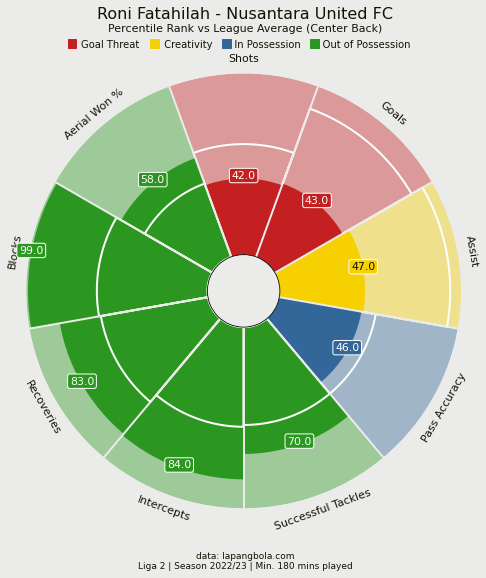

In [55]:
df_fw = df.loc[(df['Position_pct']=='Center Back')]

temp = pd.DataFrame()
klubs = pd.DataFrame()

temp['Name'] = df_fw['Name']
temp['Team'] = df_fw['Team_pct']

temp['Shots'] = round(df_fw['Shots_pct'])
temp['Goals'] = round(df_fw['Goals_pct'])

temp['Assist'] = round(df_fw['Assist_pct'])

temp['Pass Accuracy'] = round(df_fw['Pass Accuracy_pct'])

temp['Successful Tackles'] = round(df_fw['Tackle_pct'])
temp['Intercepts'] = round(df_fw['Intercepts_pct'])
temp['Recoveries'] = round(df_fw['Recovery_pct'])
temp['Blocks'] = round(df_fw['Block_pct'])
temp['Aerial Won %'] = round(df_fw['Aerial Won %_pct'])

temp = temp[(temp['Name']=='Roni Fatahilah') | (temp['Name']=='Average CB')].reset_index()

klubs['Team'] = temp['Team']

temp = temp.drop(['Team'],axis=1)

player = temp[~temp['Name'].str.contains('Average')]
avg_player = temp[temp['Name'].str.contains('Average')]
club = klubs[~klubs['Team'].str.contains('Average')]
p_name = list(player['Name'])[0]
av_name = list(avg_player['Name'])[0]
c_name = list(club['Team'])[0]

filename = 'perf.radar_' + p_name + '.jpg'

params = list(temp.columns)
params = params[2:]
params

a_values = []
b_values = []
    
for x in range(len(temp['Name'])):
    if temp['Name'][x] == p_name:
        a_values = temp.iloc[x].values.tolist()
    if temp['Name'][x] == av_name:
        b_values = temp.iloc[x].values.tolist()
        
a_values = a_values[2:]
b_values = b_values[2:]

values = [a_values,b_values]

slice_colors = ["#C42021"] * 2 + ["#F7D002"] * 1 + ["#336699"] * 1 + ["#2B9720"] * 5
text_colors = ["#FCFFFD"] * 2 + ["#141204"] * 1 + ["#FCFFFD"] * 6

baker = PyPizza(
    params=params,                  # list of parameters
    background_color="#EBEBE9",     # background color
    straight_line_color="#EBEBE9",  # color for straight lines
    straight_line_lw=2,             # linewidth for straight lines
    last_circle_lw=0,               # linewidth of last circle
    other_circle_lw=0,              # linewidth for other circles
    inner_circle_size=20            # size of inner circle
)

# plot pizza
fig, ax = baker.make_pizza(
    a_values,
    compare_values=b_values,                          # list of values
    figsize=(8, 8),                # adjust figsize according to your need
    color_blank_space="same",        # use same color to fill blank space
    slice_colors=slice_colors,       # color for individual slices
    value_colors=text_colors,        # color for the value-text
    value_bck_colors=slice_colors,   # color for the blank spaces
    blank_alpha=0.4,                 # alpha for blank-space colors
    kwargs_slices=dict(
        edgecolor="none", zorder=0, linewidth=2
    ),
    
    kwargs_compare=dict(
        facecolor="none", edgecolor="#FCFFFD",
        zorder=8, linewidth=2
                                   ),                               # values to be used when plotting slices
    kwargs_params=dict(
        color="#141204", fontsize=11,
        va="center"
    ),                               # values to be used when adding parameter
    kwargs_values=dict(
        color="#252627", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#FCFFFD",
            boxstyle="round,pad=0.2", lw=1
        )
    ),
    
    kwargs_compare_values=dict(
        color="#252627", fontsize=11, zorder=3, alpha=0,
        bbox=dict(edgecolor="#252627", facecolor="#E1E2EF", boxstyle="round,pad=0.2", lw=1, alpha = 0)
    ),                                # values to be used when adding parameter-values
)

# add title
fig.text(
    0.515, 0.975, p_name + ' - ' + c_name, size=16,
    ha="center", color="#141204"
)

# add subtitle
fig.text(
    0.515, 0.953,
    "Percentile Rank vs League Average (Center Back)",
    size=11,
    ha="center", color="#141204"
)

# add credits
CREDIT_1 = "data: lapangbola.com"
CREDIT_2 = "Liga 2 | Season 2022/23 | Min. 180 mins played"

fig.text(
    0.515, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
    color="#141204",
    ha="center"
)

# add text
fig.text(
    0.230, 0.925, "Goal Threat        Creativity       In Possession       Out of Possession", size=10,
    color="#141204",
)

# add rectangles
fig.patches.extend([
    plt.Rectangle(
        (0.207, 0.925), 0.015, 0.015, fill=True, color="#C42021",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.350, 0.925), 0.015, 0.015, fill=True, color="#F7D002",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.475, 0.925), 0.015, 0.015, fill=True, color="#336699",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.628, 0.925), 0.015, 0.015, fill=True, color="#2B9720",
        transform=fig.transFigure, figure=fig
    ),
])

# add image
#ax_image = add_image(
#    im, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.141
#)   # these values might differ when you are plotting

plt.show()

fig.savefig('/content/gdrive/MyDrive/Nusantara United FC/Evaluasi Paruh Musim/Plot/Player/'+filename, dpi=500, bbox_inches='tight')

GOALKEEPER TEMPLATE

In [ ]:
df_fw = df.loc[(df['Position_pct']=='Goalkeeper')]

temp = pd.DataFrame()
klubs = pd.DataFrame()

temp['Name'] = df_fw['Name']
temp['Team'] = df_fw['Team_pct']

temp['Long Goal Kick %'] = round(df_fw['Long Goal Kick %_pct'])
temp['Pass Accuracy'] = round(df_fw['Pass Accuracy_pct'])

temp['Cross Claimed'] = round(df_fw['Cross Claim_pct'])
temp['Sweeping Actions'] = round(df_fw['Keeper - Sweeper_pct'])
temp['Save Percentage'] = round(df_fw['Save Percentage_pct'])
temp['Saves'] = round(df_fw['Saves_pct'])
temp['Penalties Saved'] = round(df_fw['Penalty Save_pct'])

temp = temp[(temp['Name']=='Fery Bagus Kurniawan') | (temp['Name']=='Average GK')].reset_index()

klubs['Team'] = temp['Team']

temp = temp.drop(['Team'],axis=1)

player = temp[~temp['Name'].str.contains('Average')]
avg_player = temp[temp['Name'].str.contains('Average')]
club = klubs[~klubs['Team'].str.contains('Average')]
p_name = list(player['Name'])[0]
av_name = list(avg_player['Name'])[0]
c_name = list(club['Team'])[0]

filename = 'perf.radar_' + p_name + '.jpg'

params = list(temp.columns)
params = params[2:]
params

a_values = []
b_values = []
    
for x in range(len(temp['Name'])):
    if temp['Name'][x] == p_name:
        a_values = temp.iloc[x].values.tolist()
    if temp['Name'][x] == av_name:
        b_values = temp.iloc[x].values.tolist()
        
a_values = a_values[2:]
b_values = b_values[2:]

values = [a_values,b_values]

slice_colors = ["#C42021"] * 2 + ["#336699"] * 5
text_colors = ["#FCFFFD"] * 7

baker = PyPizza(
    params=params,                  # list of parameters
    background_color="#EBEBE9",     # background color
    straight_line_color="#EBEBE9",  # color for straight lines
    straight_line_lw=2,             # linewidth for straight lines
    last_circle_lw=0,               # linewidth of last circle
    other_circle_lw=0,              # linewidth for other circles
    inner_circle_size=20            # size of inner circle
)

# plot pizza
fig, ax = baker.make_pizza(
    a_values,
    compare_values=b_values,                          # list of values
    figsize=(8, 8),                # adjust figsize according to your need
    color_blank_space="same",        # use same color to fill blank space
    slice_colors=slice_colors,       # color for individual slices
    value_colors=text_colors,        # color for the value-text
    value_bck_colors=slice_colors,   # color for the blank spaces
    blank_alpha=0.4,                 # alpha for blank-space colors
    kwargs_slices=dict(
        edgecolor="none", zorder=0, linewidth=2
    ),
    
    kwargs_compare=dict(
        facecolor="none", edgecolor="#FCFFFD",
        zorder=8, linewidth=2
                                   ),                               # values to be used when plotting slices
    kwargs_params=dict(
        color="#141204", fontsize=11,
        va="center"
    ),                               # values to be used when adding parameter
    kwargs_values=dict(
        color="#252627", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#FCFFFD",
            boxstyle="round,pad=0.2", lw=1
        )
    ),
    
    kwargs_compare_values=dict(
        color="#252627", fontsize=11, zorder=3, alpha=0,
        bbox=dict(edgecolor="#252627", facecolor="#E1E2EF", boxstyle="round,pad=0.2", lw=1, alpha = 0)
    ),                                # values to be used when adding parameter-values
)

# add title
fig.text(
    0.515, 0.975, p_name + ' - ' + c_name, size=16,
    ha="center", color="#141204"
)

# add subtitle
fig.text(
    0.515, 0.953,
    "Percentile Rank vs League Average (Goalkeeper)",
    size=11,
    ha="center", color="#141204"
)

# add credits
CREDIT_1 = "data: lapangbola.com"
CREDIT_2 = "Liga 2 | Season 2022/23 | Min. 180 mins played"

fig.text(
    0.515, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
    color="#141204",
    ha="center"
)

# add text
fig.text(
    0.230, 0.925, "                               Distribution              Goalkeeping", size=10,
    color="#141204",
)

# add rectangles
fig.patches.extend([
    plt.Rectangle(
        (0.375, 0.925), 0.015, 0.015, fill=True, color="#C42021",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.550, 0.925), 0.015, 0.015, fill=True, color="#336699",
        transform=fig.transFigure, figure=fig
    ),
])

# add image
#ax_image = add_image(
#    im, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.141
#)   # these values might differ when you are plotting

plt.show()

fig.savefig('/content/gdrive/MyDrive/Nusantara United FC/Evaluasi Paruh Musim/Plot/Player/'+filename, dpi=500, bbox_inches='tight')